In [4]:
#%% import modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py 
plt.rcParams.update({'font.size': 18})

In [5]:
step = '0'
path = '/home/lxue07/Documents/aspect/rifting/\
output-test-from-extension_2.64_cons_load_hdf5/solution/solution-000'+str(step).zfill(2)+ '.h5'
f_l = h5py.File(path, 'r')
path = '/home/lxue07/Documents/aspect/rifting/\
output-test-from-extension_2.64_unload_load_hdf5/solution/solution-000'+ str(step).zfill(2)+ '.h5'
f_ul = h5py.File(path, 'r')
path = '/home/lxue07/Documents/aspect/rifting/\
output-test-from-extension_2.65_unload_load_highT_hdf5/solution/solution-000'+ str(step).zfill(2)+ '.h5'
f_ul_h = h5py.File(path, 'r')

print ('output variables:', f_ul.keys())
path_xy = '/home/lxue07/Documents/aspect/rifting/\
output-test-from-extension_2.64_cons_load_hdf5/solution/mesh-00000.h5'
mesh =h5py.File(path_xy, 'r')
#node in x, y, z
x = mesh['nodes'][:,0]
y = mesh['nodes'][:,1]
mf = f_ul['melt_fraction'][:,0]
strain_rate = f_ul['strain_rate'][:,0]
diff_mf = f_ul['melt_fraction'][:,0] - f_l['melt_fraction'][:,0]
diff_p = f_ul['p'][:,0] - f_l['p'][:,0]
diff_nonad_p = f_ul['nonadiabatic_pressure'][:,0] - f_l['nonadiabatic_pressure'][:,0]
p_l= f_l['p'][:,0]
p_ul = f_ul['p'][:,0]
t = f_ul['T'][:,0]
t_h= f_ul_h ['T'][:,0]

output variables: <KeysViewHDF5 ['T', 'adiabatic_heating', 'compositional_heating', 'crust_lower', 'crust_upper', 'current_cohesions', 'current_friction_angles', 'density', 'latent_heat', 'mantle_lithosphere', 'melt_fraction', 'nonadiabatic_pressure', 'nonadiabatic_temperature', 'noninitial_plastic_strain', 'p', 'plastic_strain', 'plastic_yielding', 'principal_stress_1', 'principal_stress_2', 'principal_stress_direction_1', 'principal_stress_direction_2', 'shear_heating', 'shear_stress_xx', 'shear_stress_xy', 'shear_stress_yx', 'shear_stress_yy', 'strain_rate', 'stress_xx', 'stress_xy', 'stress_yx', 'stress_yy', 'velocity', 'viscosity']>


In [250]:
df = pd.DataFrame()
df['x'] = x
df['y'] = y
df['depth'] = max(df['y']) - df['y']
df['T'] = t
df['h_T'] = t_h

df['p']= p_ul
df['p'] = df['p']*1e-9
df['nonadiabatic_p'] = f_ul['nonadiabatic_pressure'][:,0]
df.head()

df['p1'] = f_l['principal_stress_1'][:,0]
df['p2'] = f_l['principal_stress_2'][:,0]
df['xx'] = f_l['stress_xx'][:,0]
df['xy'] = f_l['stress_xy'][:,0]
df['yy'] = f_l['stress_yy'][:,0]
df['xx_h'] = f_ul_h['stress_xx'][:,0]
df['xy_h'] = f_ul_h['stress_xy'][:,0]
df['yy_h'] = f_ul_h['stress_yy'][:,0]

df = df[df['x']<100]
# pressure gradian from Njinju 2021 from the figure 
#df['p2'] = (200e3 - df['y'])*1e-3*14/400
# presure gradient:  0.03571428571428571 Gpa/km  Sakuyama et al., 2013
# presure gradient:  0.035 Gpa/km
# presure gradient: 0.03125 GPa/km Grott 2013
# ASPECT visco plastic model use 32436 Pa/m, 0.032436 GPa/km
df['pressure'] = (df['depth'])*1e-3*0.032436

a1= 1080 
a2 = 132.9
a3 = -5.1
b1 = 1475
b2= 80
b3 = -3.2
c1 = 1780
c2 = 45
c3 = -2
p= 1
T_s = a1+a2*p+a3*p*p +273
T_l = b1+b2*p+b3*p*p +273

df['T_s'] = a1+a2*df['pressure']+a3*df['pressure']*df['pressure'] +273
df['T_l'] = b1+b2*df['pressure']+b3*df['pressure']*df['pressure'] +273
# df['T_s'] = np.flip (df['T_s'])
# df['T_l'] = df['T_l']
def solidus(p):
    return a1+a2*p+a3*p**2 +273
def lherz(p):
    return b1+b2*p+b3*p**2 +273
def liquidus(p):
    return c1+c2*p+c3*p**2 +273

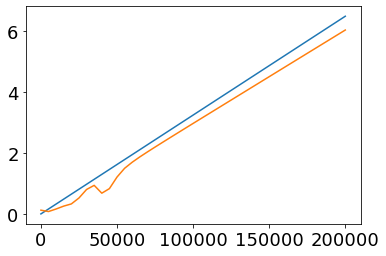

In [251]:
plt.plot(df['depth'], df['pressure'])
plt.plot(df['depth'], df['p'])
#plt.plot(df['depth'], df['depth']*25e-6)

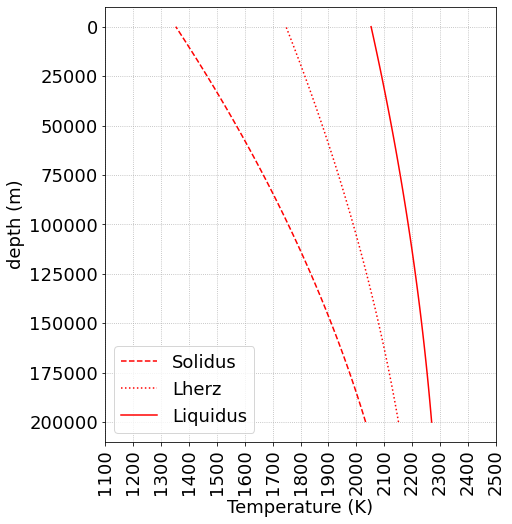

In [226]:

fig,ax = plt.subplots(figsize=(7,8))
# plt.plot( df['T'], df['depth'],  label = '55mW/m\u00b2')
# plt.plot( df['h_T'], df['depth'], c= 'green', label = '60mW/m\u00b2')
# plt.plot( [solidus(x) for x in df['p']], df['depth'], c= 'blue', linestyle = '--', label = 'Solidus')
# plt.plot( [lherz(x) for x in df['p']], df['depth'], c= 'blue', linestyle = ':', label = 'Lherz')
# plt.plot( [liquidus(x) for x in df['p']], df['depth'], c= 'blue', label = 'Liquidus')

plt.plot( [solidus(x) for x in df['pressure']], df['depth'], c= 'red', linestyle = '--', label = 'Solidus')
plt.plot( [lherz(x) for x in df['pressure']], df['depth'], c= 'red', linestyle = ':', label = 'Lherz')
plt.plot( [liquidus(x) for x in df['pressure']], df['depth'], c= 'red', label = 'Liquidus')

         
plt.legend()
plt.grid(linestyle='dotted')
plt.xlabel('Temperature (K)')
plt.ylabel('depth (m)')
plt.gca().invert_yaxis()
ax.set_xticks(np.linspace(1300, 1900, 7))
plt.xticks(rotation = 90)
ax.set_xticks(np.linspace(1100, 2500, 15))
# ax.set_yticks([0, 50000, 100000, 150000, 200000])
# ax.set_yticklabels([200, 150,100, 50, 0 ])

In [241]:
# different thermal gradient/heat flux and depth of LAB
def temp_z(depth , qt1= 55e-3, moho = 35e3, lab= 150e3):
    
    # qt1 crust heat flow Wm-2
    qt2= 25e-3 #lithenshpric mantle heat flow Wm-2
    # depth m 
    
    A1 = 8.98e-7 # crust heat production  Wm-3
    A2 = 5e-8 # mantle heat production  Wm-3
    K1 = 2.5 # crust thermal conductivity  Wm-1k-1
    K2 = 2.5 # mantle thermal conductivity  Wm-1k-1
    adiabat =  0.5e-3 #0.4K/m
    if depth<= moho:
        T = 273 + qt1*depth/K1 - A1*depth**2/(2*K1) 
        
    elif(depth>moho)&(depth<=lab):
        T = 273 + qt1*moho/K1 - A1*moho**2/(2*K1) +qt2*(depth-moho)/K2 - A2*(depth-moho)**2/(2*K2)
    else:
        T = 273 + qt1*moho/K1 - A1*moho**2/(2*K1) +qt2*(lab-moho)/K2 - A2*(lab-moho)**2/(2*K2) +\
        (depth-lab)*adiabat
    return T
    
print ('moho temp:',temp_z(35e3), 'K\n', 'mantle potential temp:',temp_z( 150e3), 'K')


# test = np.linspace(1, 300e3)
# test_s =[temp_z(x) for x in test]
# plt.plot (np.linspace(1, 300e3), test_s)

moho temp: 822.99 K
 mantle potential temp: 1840.74 K


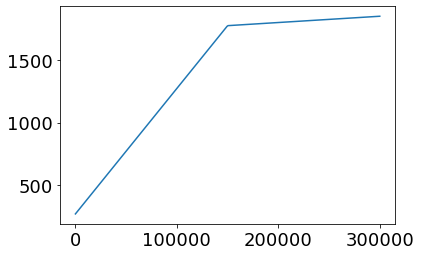

In [264]:
def temp_z_tp(depth , tp= 1772., lab= 150e3):
    gradient = 0.5e-3
    if depth<= lab:
        T= (tp-273)*depth/lab +273
    else:
        T = tp+ gradient*(depth-lab)
    return T  
        
case = np.linspace(1, 300e3, 300)
plt.plot(case, [temp_z_tp(x) for x in case])

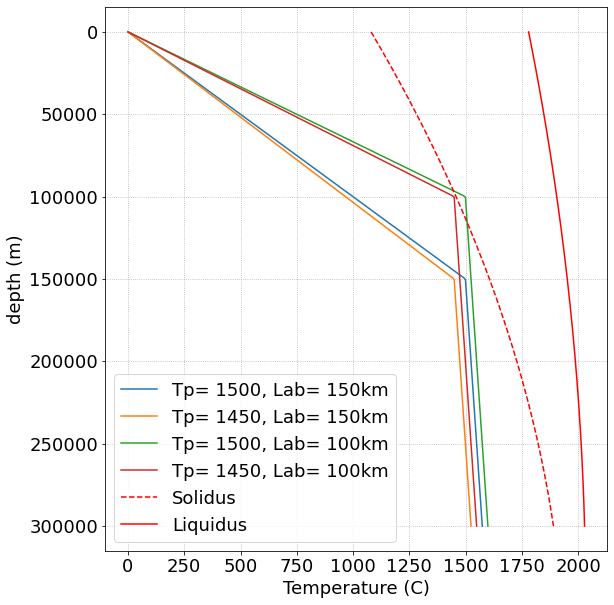

In [276]:
lab1 = 150e3
lab2 = 100e3
qt1= 65e-3
qt2 = 55e-3
fig,ax = plt.subplots(figsize=(9,10))
plt.plot( [temp_z_tp(x, tp= 1772,lab= 150e3)-273 for x in case], case, 
         label = 'Tp= 1500, Lab= 150km')
plt.plot( [temp_z_tp(x, tp= 1722,lab= 150e3)-273 for x in case], case, 
          label = 'Tp= 1450, Lab= 150km')
plt.plot( [temp_z_tp(x, tp= 1772,lab= 100e3)-273 for x in case], case, 
          label = 'Tp= 1500, Lab= 100km')
plt.plot( [temp_z_tp(x, tp= 1722,lab= 100e3)-273 for x in case], case, 
          label = 'Tp= 1450, Lab= 100km')

plt.plot( [solidus(x*1e-3*0.032436)-273 for x in case], case, c= 'red', linestyle = '--', label = 'Solidus')
plt.plot( [liquidus(x*1e-3*0.032436)-273 for x in case], case, c= 'red', label = 'Liquidus')
plt.legend()
plt.grid(linestyle='dotted')
plt.xlabel('Temperature (C)')
plt.ylabel('depth (m)')
plt.gca().invert_yaxis()
# ax.set_yticks([0, 50000, 100000, 150000, 200000])
# ax.set_yticklabels([200, 150,100, 50, 0 ])